<a href="https://colab.research.google.com/github/amien1410/kaggle-projects/blob/main/Data_Science_Jobs_and_Salary_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Install Kaggle Modules to download the dataset
!pip install kaggle

# Load Kaggle user authorization key
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

# Download the dataset, get the user and dataset name from the url "https://www.kaggle.com/datasets/shivamb/netflix-shows"
!kaggle datasets download -d fahadrehman07/data-science-jobs-and-salary-glassdoor

# Unzip the dataset
!unzip -q "/content/data-science-jobs-and-salary-glassdoor"

Dataset URL: https://www.kaggle.com/datasets/fahadrehman07/data-science-jobs-and-salary-glassdoor
License(s): CC0-1.0
  0% 0.00/2.22M [00:00<?, ?B/s]
100% 2.22M/2.22M [00:00<00:00, 109MB/s]


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

In [3]:
# Load dataset
df = pd.read_csv('/content/Glassdoor_Salary_Cleaned_Version.csv')
print(df.info())
print(df.describe())
print(df.isnull().sum()) # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

In [4]:
# Remove Dollar sign and convert the data into float
df.dropna(inplace=True)
df['Salary Estimate'] = df['Salary Estimate'].str.replace('[\$,]', '', regex=True)
df['Salary Estimate'] = df['Salary Estimate'].str.extract('(\d+)').astype(float)

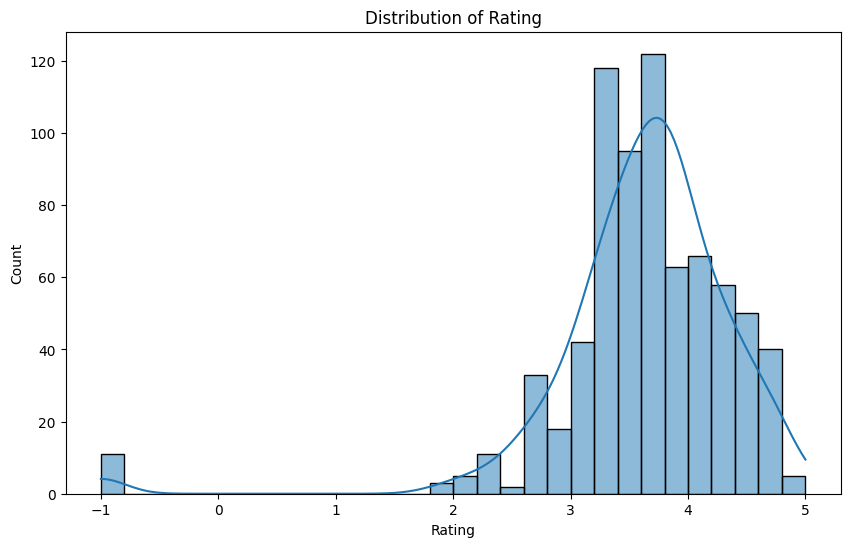

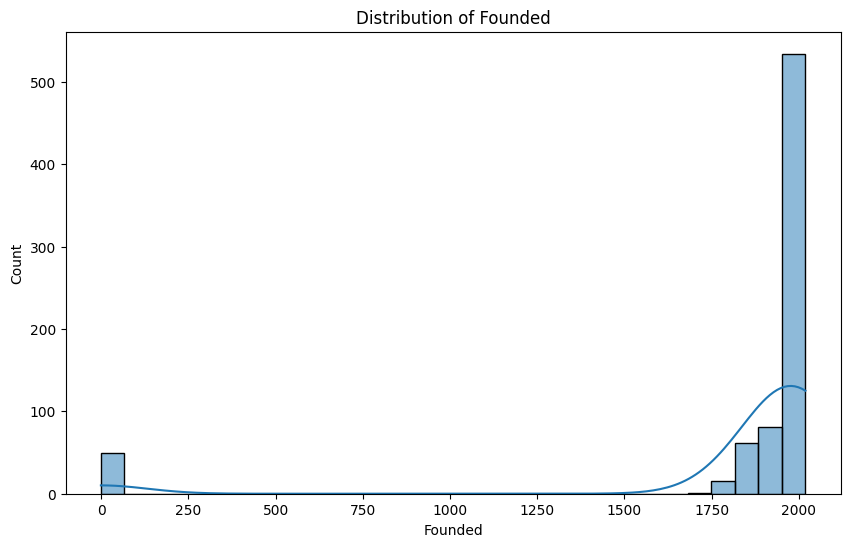

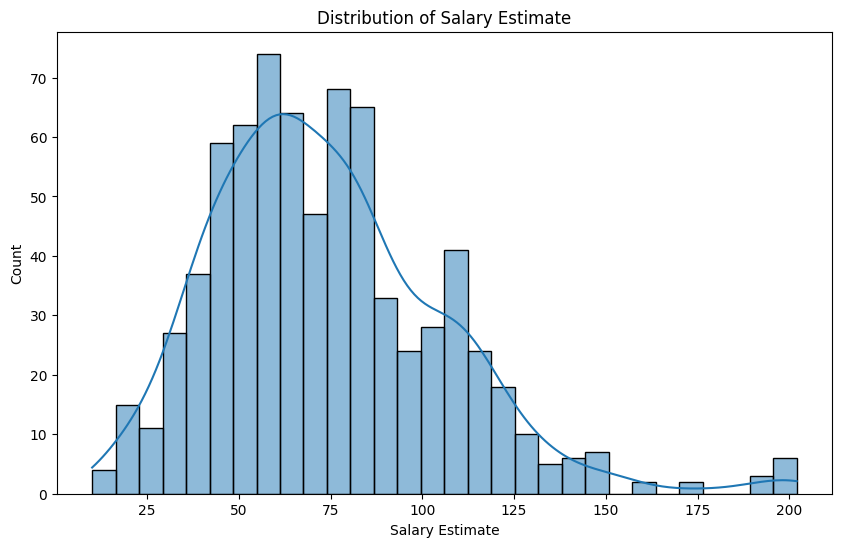

In [5]:
numerical_columns = ['Rating', 'Founded', 'Salary Estimate']
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

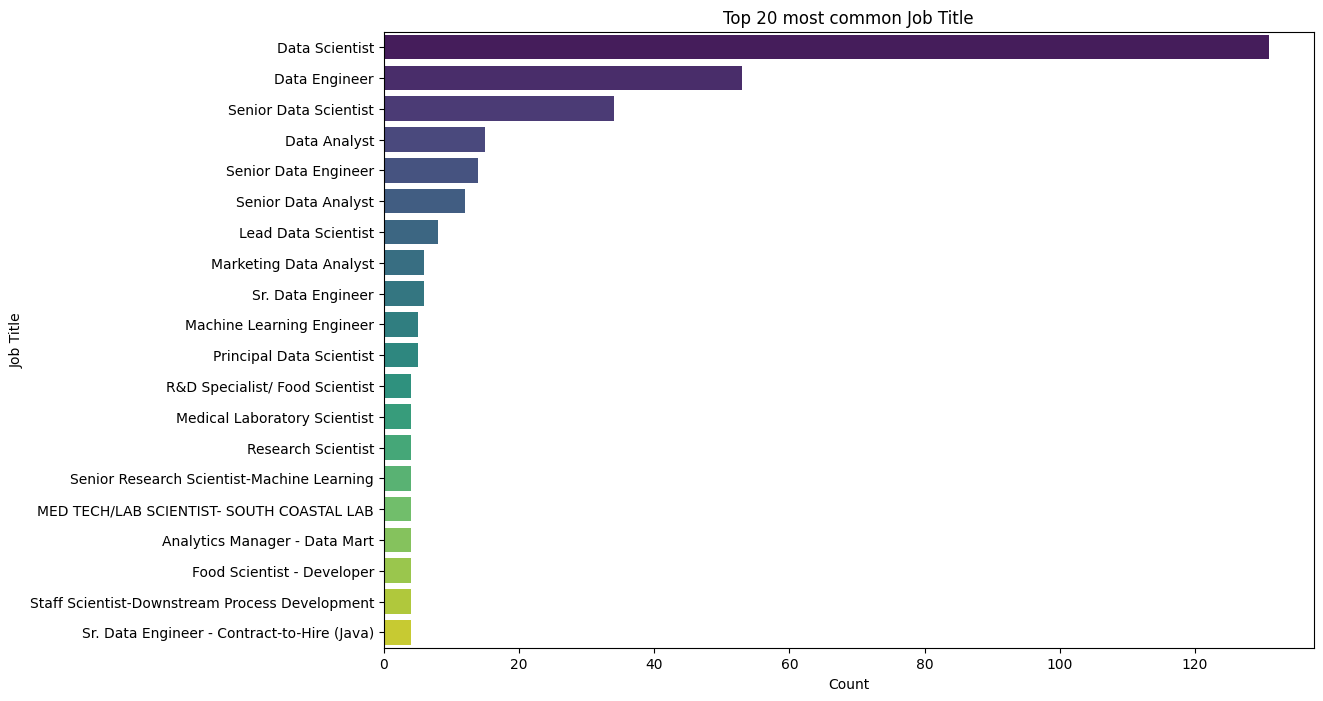

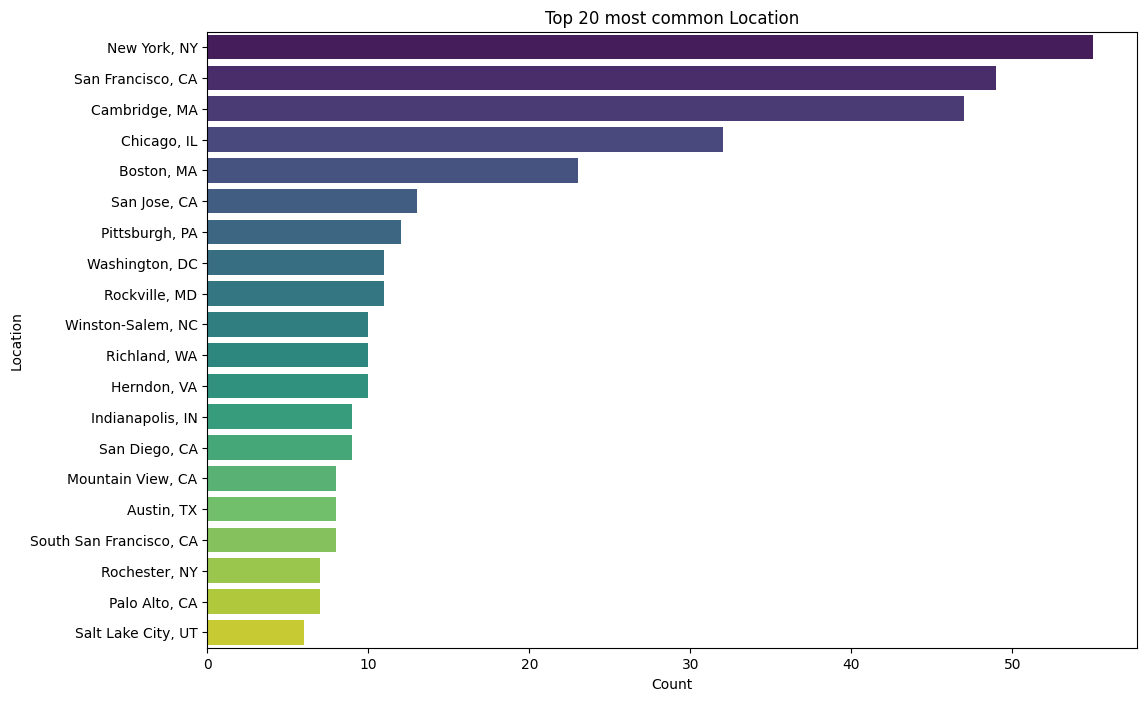

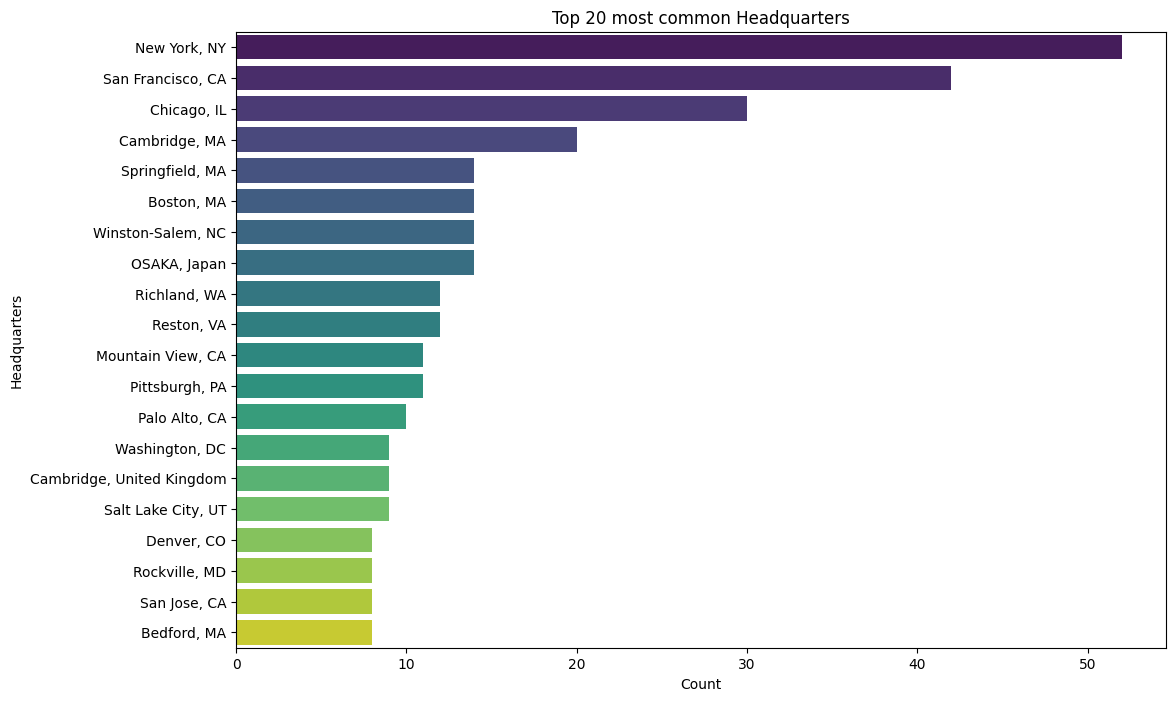

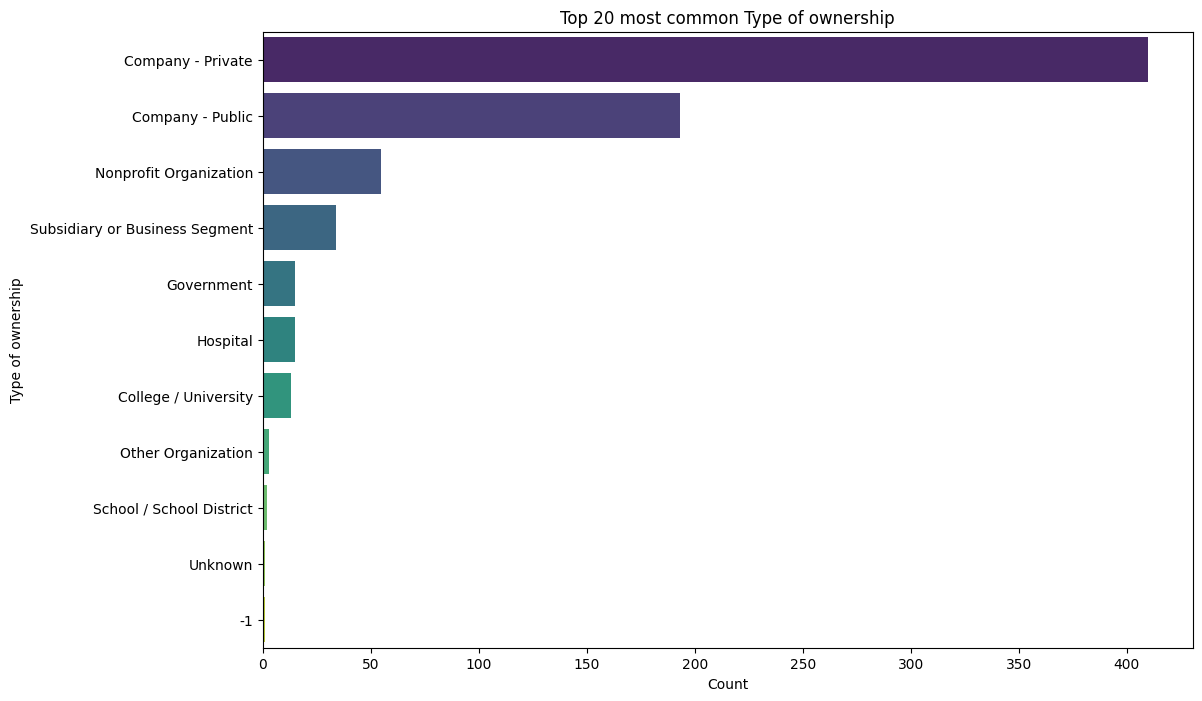

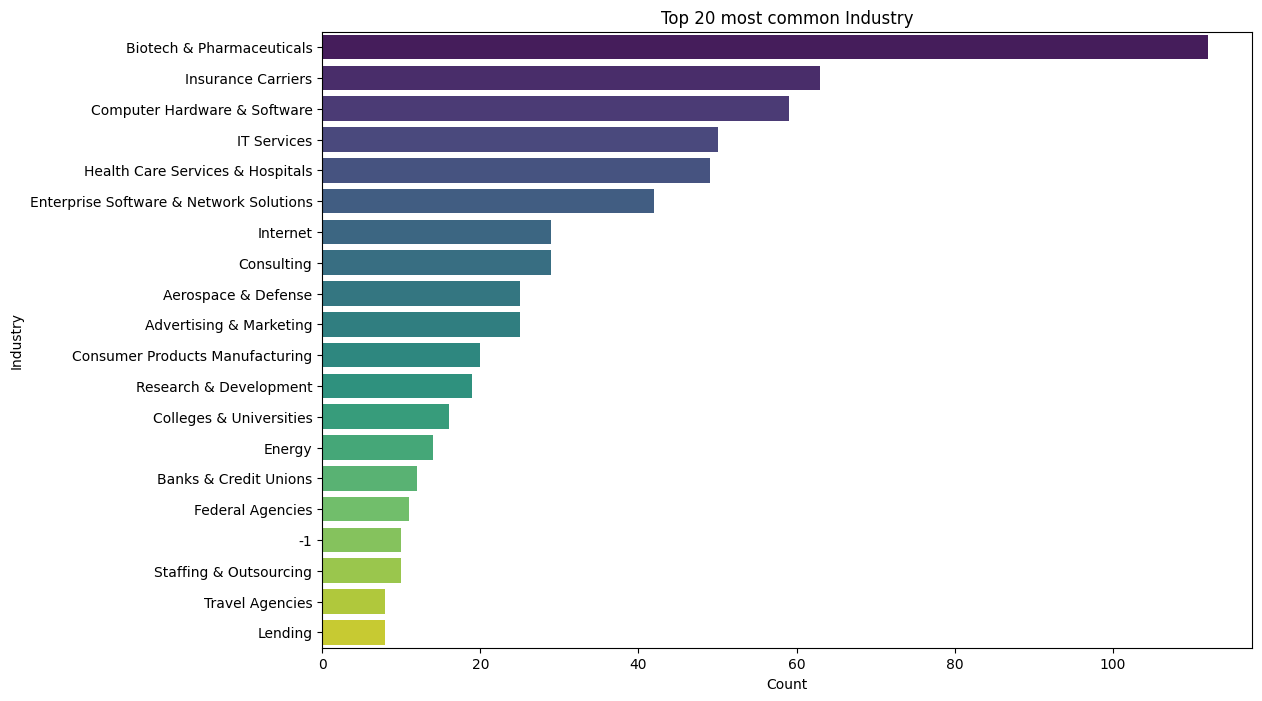

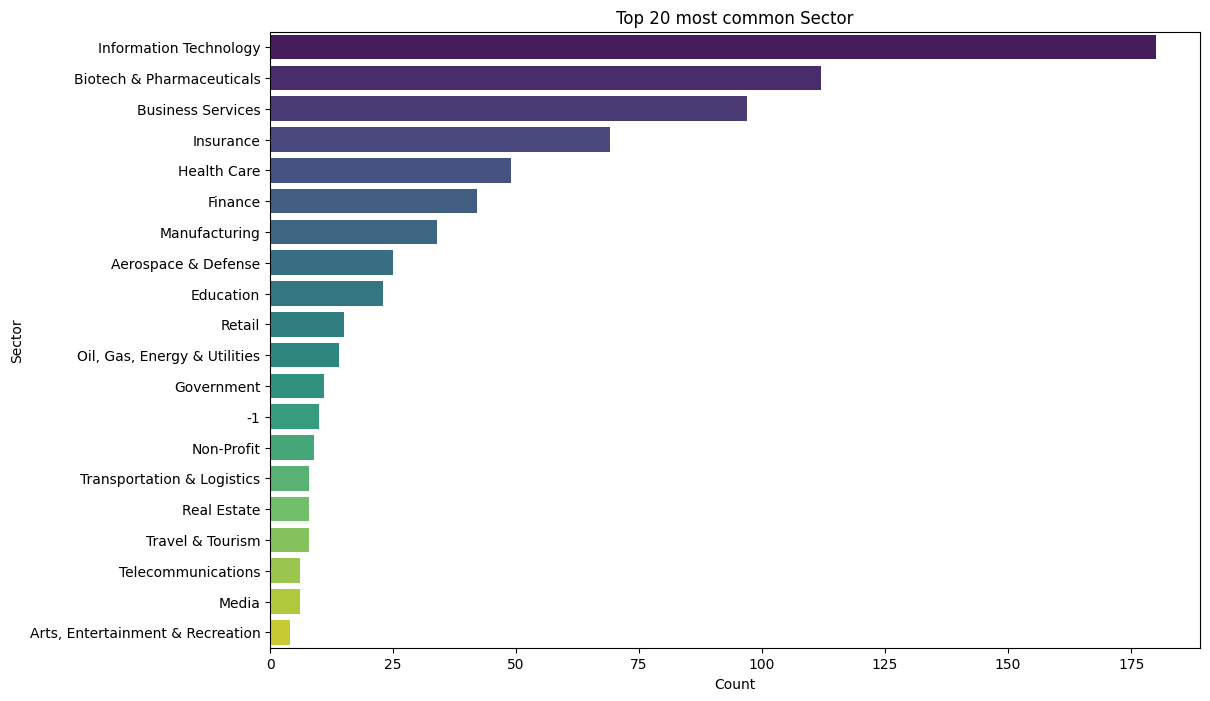

In [8]:
# Create plots for top categories
def plot_top_n_categories(df, column, n=20):
    top_n = df[column].value_counts().nlargest(n).reset_index()
    top_n.columns = [column, 'count']

    plt.figure(figsize=(12, 8))
    sns.barplot(data=top_n, y=column, x='count', palette='viridis', hue=column, dodge=False)
    plt.title(f'Top {n} most common {column}')
    plt.ylabel(column)
    plt.xlabel('Count')
    plt.gca().set_yticks(range(len(top_n)))  # Set the y-ticks to match the number of categories
    plt.gca().set_yticklabels(top_n[column], rotation=0, ha='right')  # Set the y-tick labels
    plt.legend([], [], frameon=False)  # Remove the legend
    plt.show()

categorical_columns = ['Job Title', 'Location', 'Headquarters', 'Type of ownership', 'Industry', 'Sector']
for col in categorical_columns:
    plot_top_n_categories(df, col, n=20)

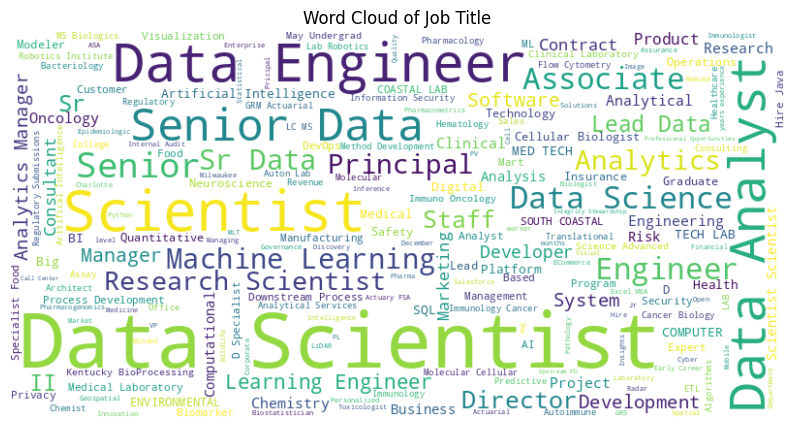

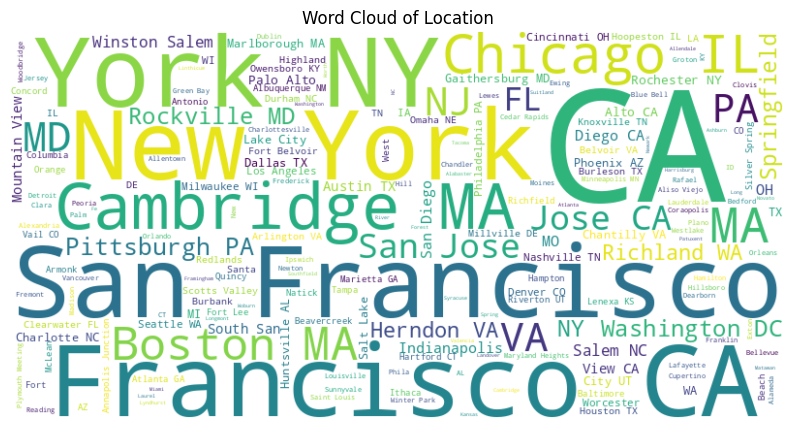

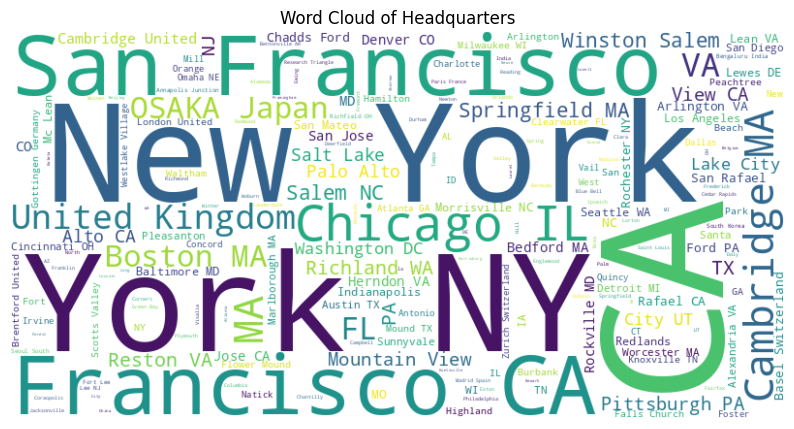

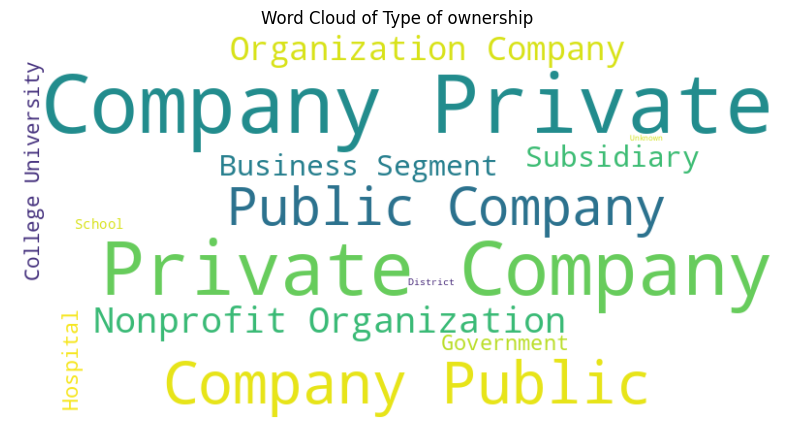

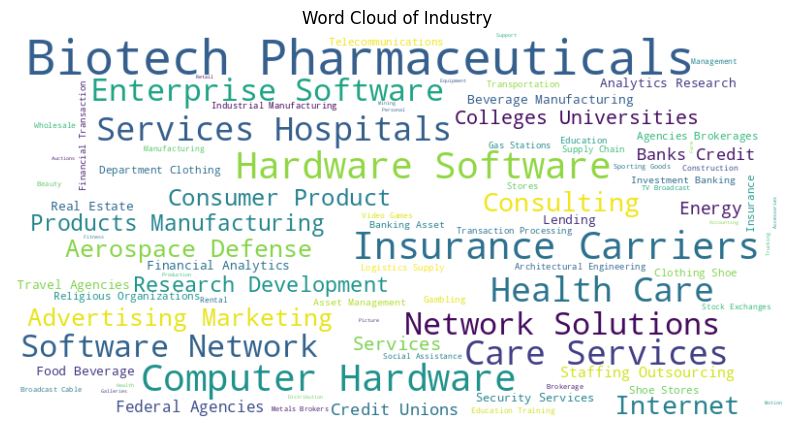

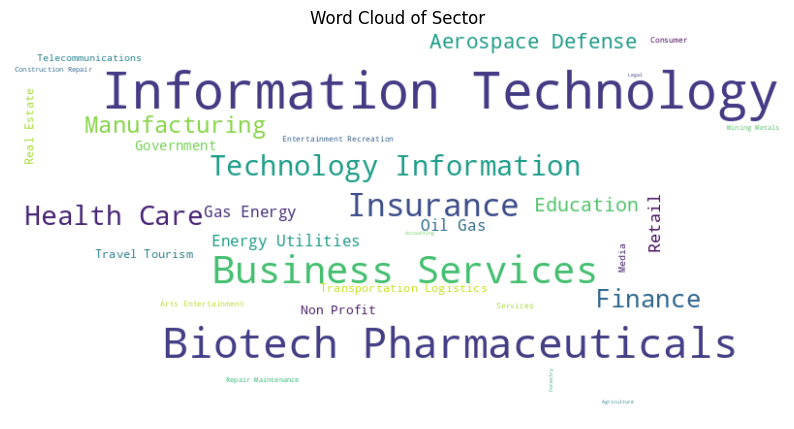

In [9]:
#@title WordCloud for High-Level View of Most Common Categories

def plot_wordcloud(df, column):
    text = ' '.join(df[column].astype(str).values)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of {column}')
    plt.show()

for col in categorical_columns:
    plot_wordcloud(df, col)

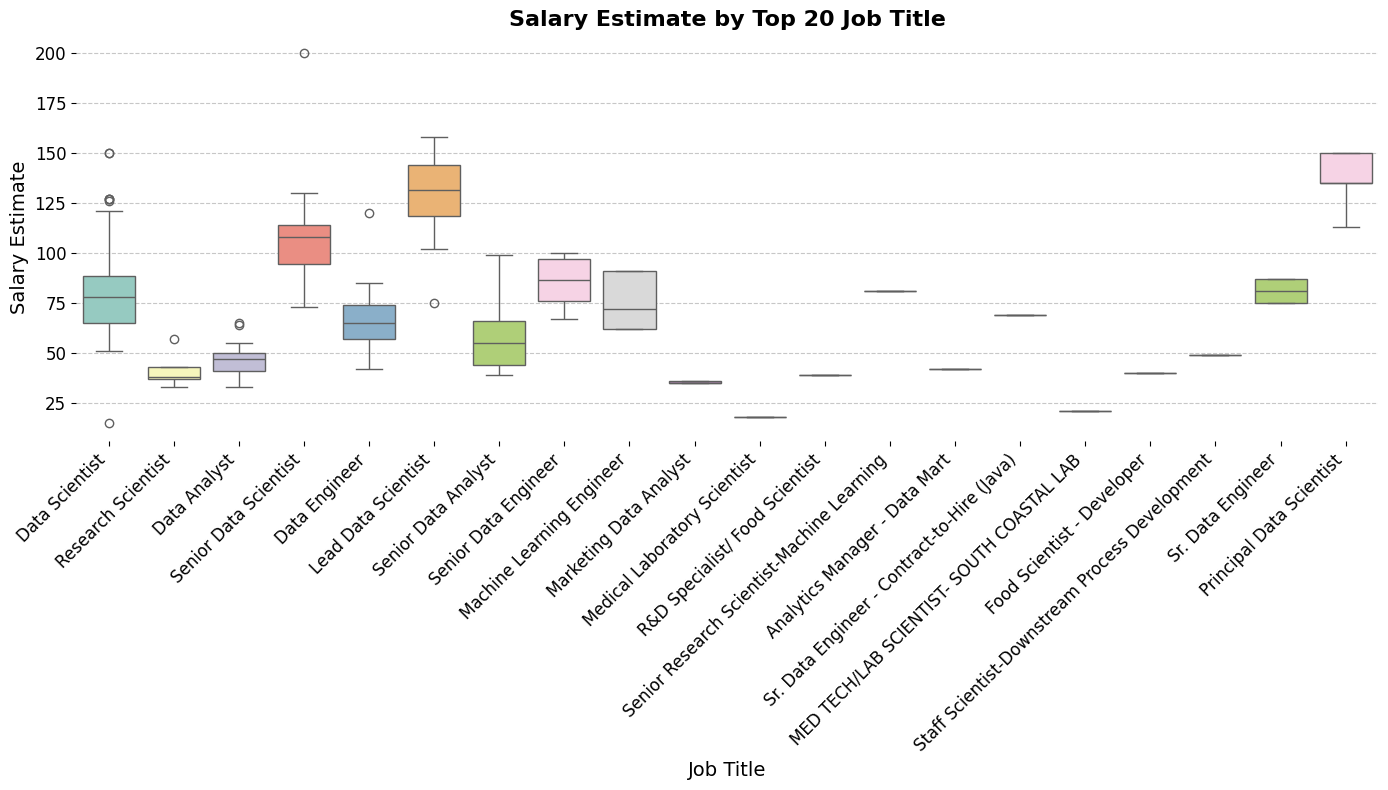

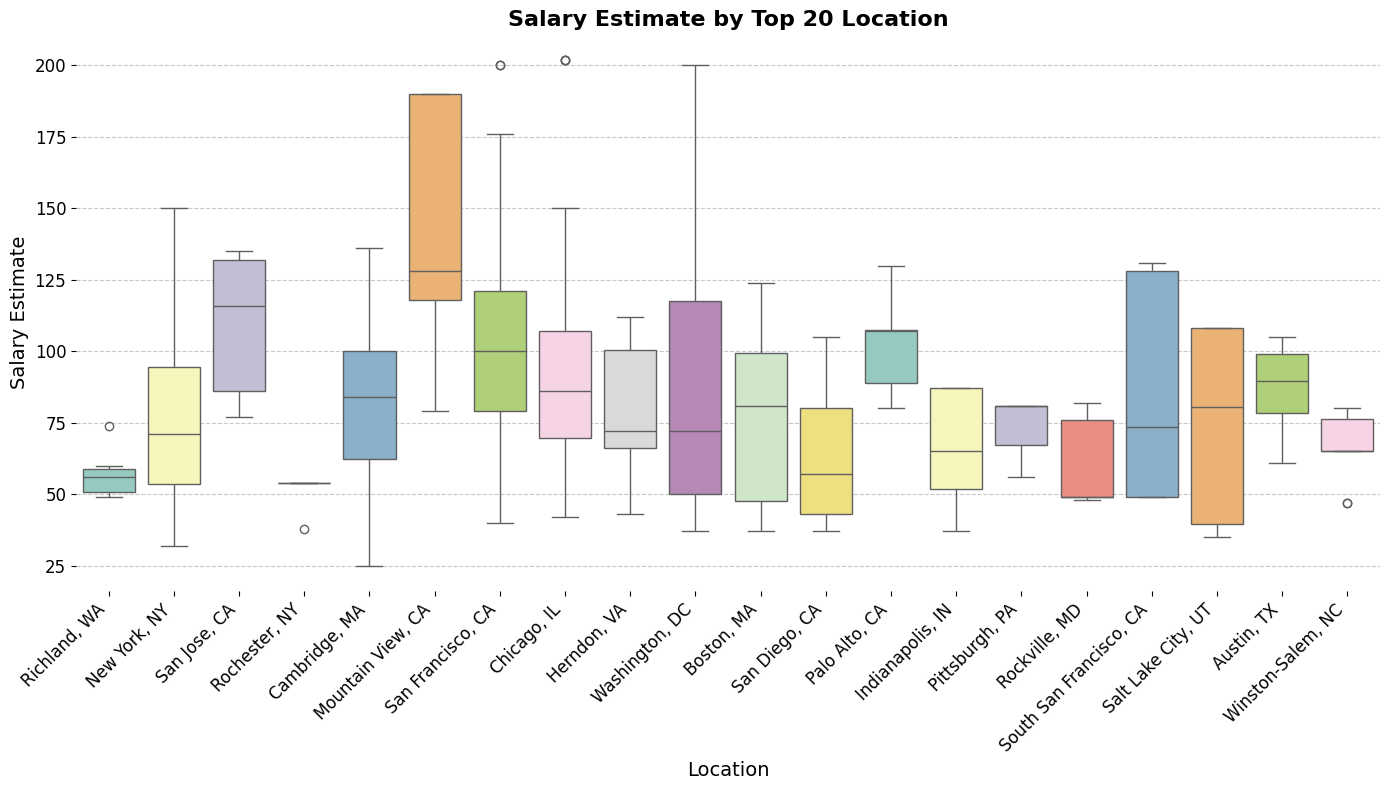

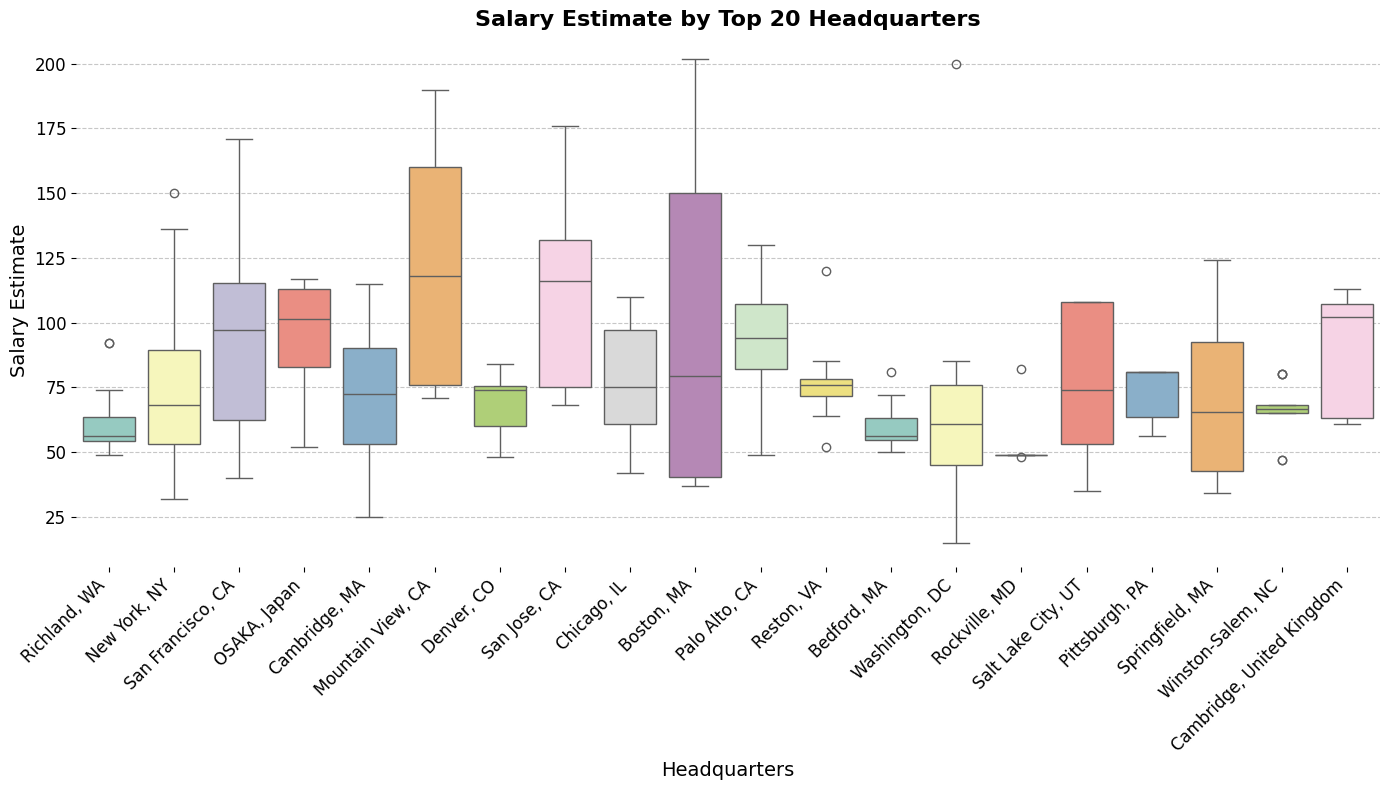

<ipython-input-15-353b79837327>:27: UserWarning: The palette list has more values (20) than needed (11), which may not be intended.
  sns.boxplot(x=df_top_n[column], y=df_top_n[target], hue=df_top_n[column], palette=palette, dodge=False)


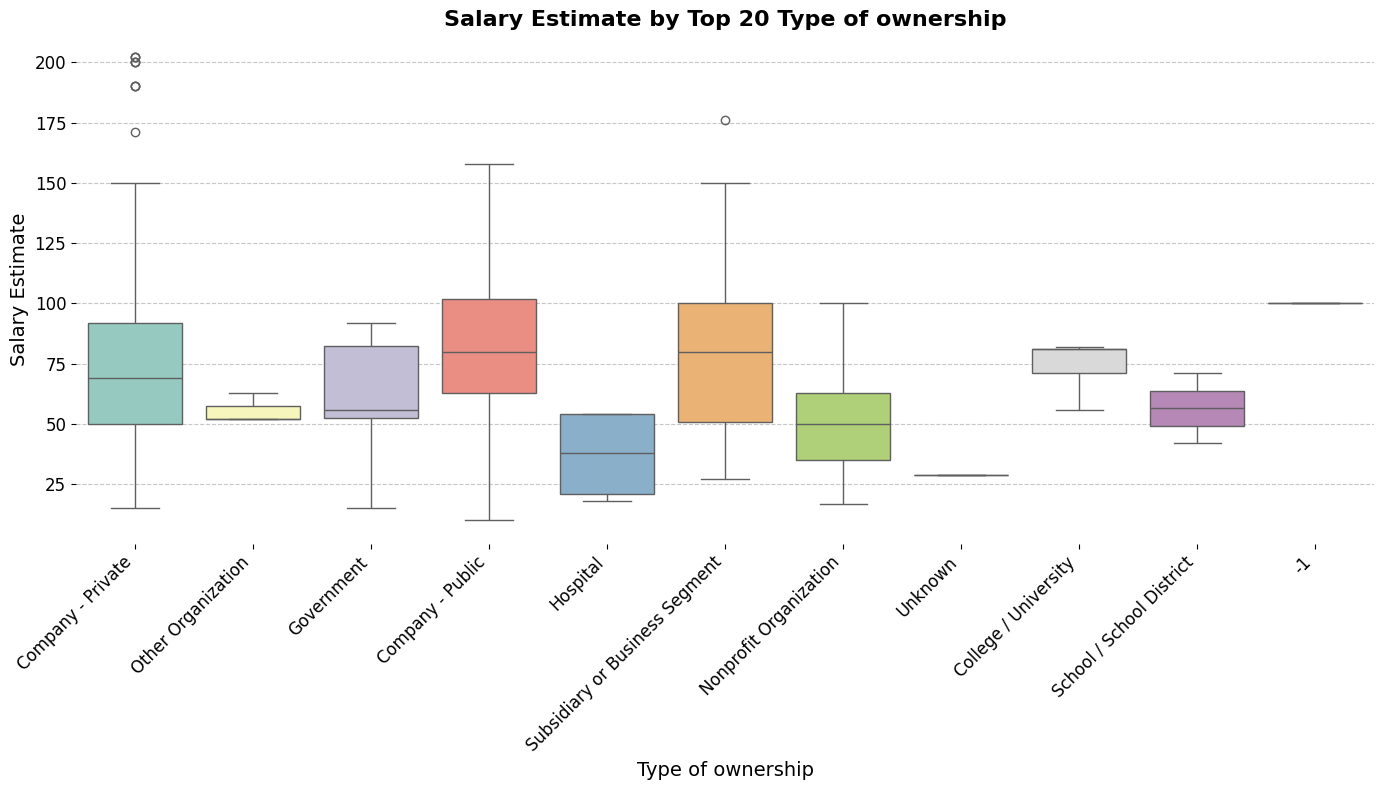

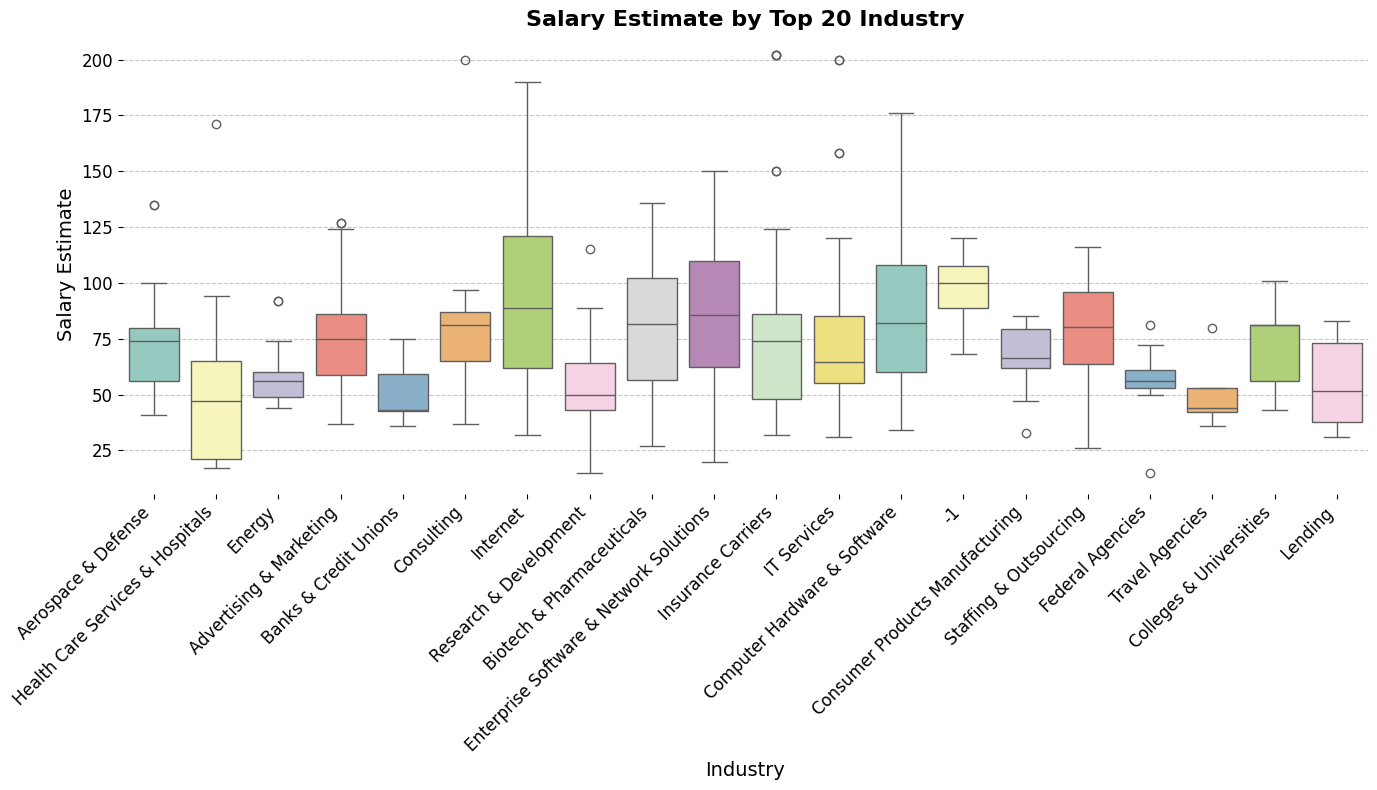

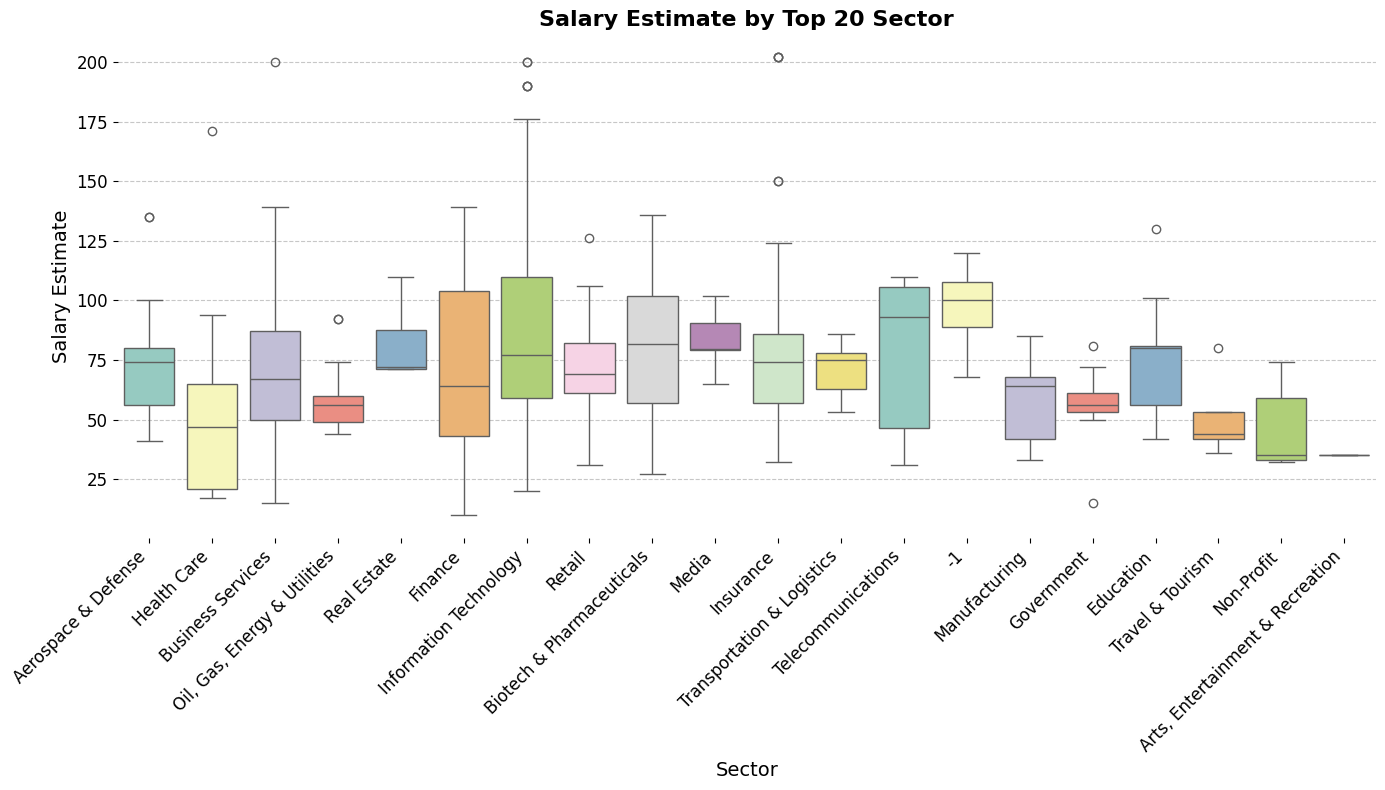

In [15]:
#@title Box Plots for Salary Estimate by Top 20 Categorical Variables
# def plot_boxplot_top_n(df, column, target, n=20):
#     top_n = df[column].value_counts().nlargest(n).index
#     df_top_n = df[df[column].isin(top_n)]
#     plt.figure(figsize=(12, 8))
#     sns.boxplot(x=df_top_n[column], y=df_top_n[target])
#     plt.title(f'{target} by Top {n} {column}')
#     plt.xticks(rotation=45, ha='right')
#     plt.show()

# for col in categorical_columns:
#     plot_boxplot_top_n(df, col, 'Salary Estimate', n=20)
def plot_boxplot_top_n(df, column, target, n=20):
    # Ensure the column and target exist in the dataframe
    if column not in df.columns or target not in df.columns:
        print(f"Error: Column '{column}' or target '{target}' not found in dataframe.")
        return

    # Get the top N categories
    top_n = df[column].value_counts().nlargest(n).index
    df_top_n = df[df[column].isin(top_n)]

    # Define a custom color palette
    palette = sns.color_palette("Set3", n_colors=n)

    plt.figure(figsize=(14, 8))
    sns.boxplot(x=df_top_n[column], y=df_top_n[target], hue=df_top_n[column], palette=palette, dodge=False)

    plt.title(f'{target} by Top {n} {column}', fontsize=16, fontweight='bold')
    plt.xlabel(column, fontsize=14)
    plt.ylabel(target, fontsize=14)

    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)

    sns.despine(left=True, bottom=True)  # Remove top and right spines
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability

    plt.legend([], [], frameon=False)  # Remove the legend
    plt.tight_layout()
    plt.show()

# List of categorical columns
categorical_columns = ['Job Title', 'Location', 'Headquarters', 'Type of ownership', 'Industry', 'Sector']

# Plot boxplots for each categorical column
for col in categorical_columns:
    plot_boxplot_top_n(df, col, 'Salary Estimate', n=20)

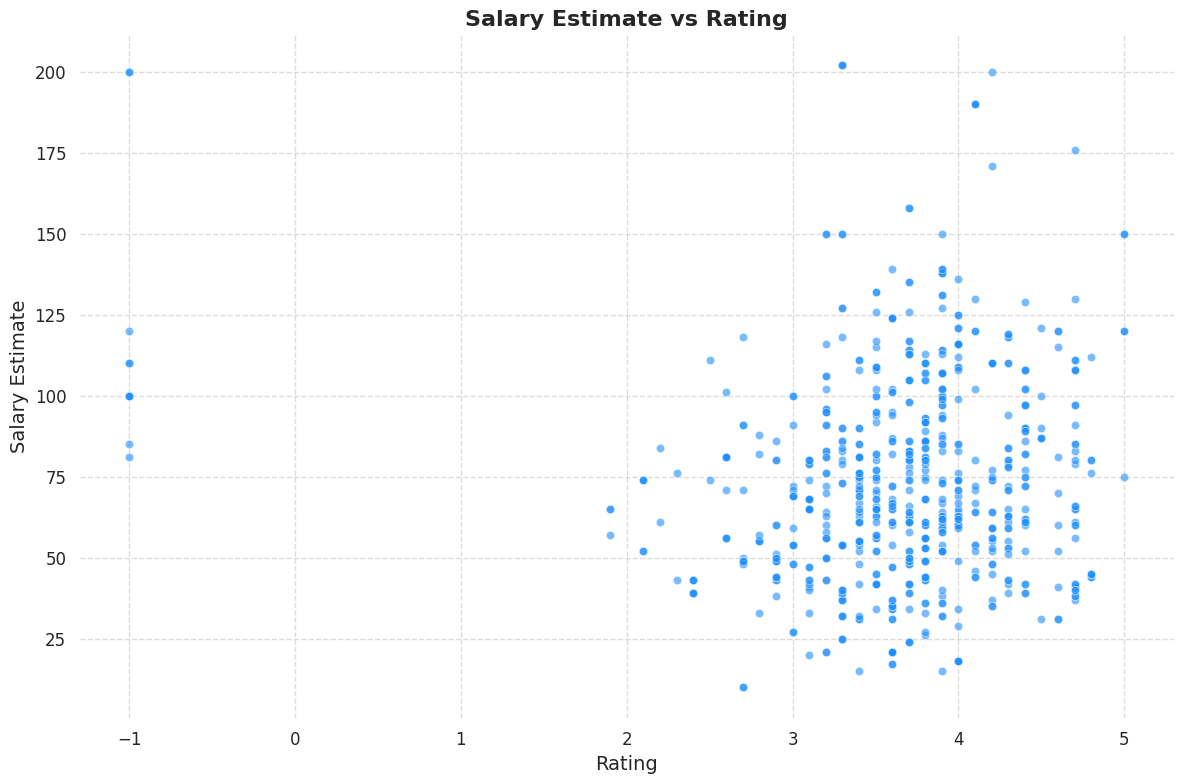

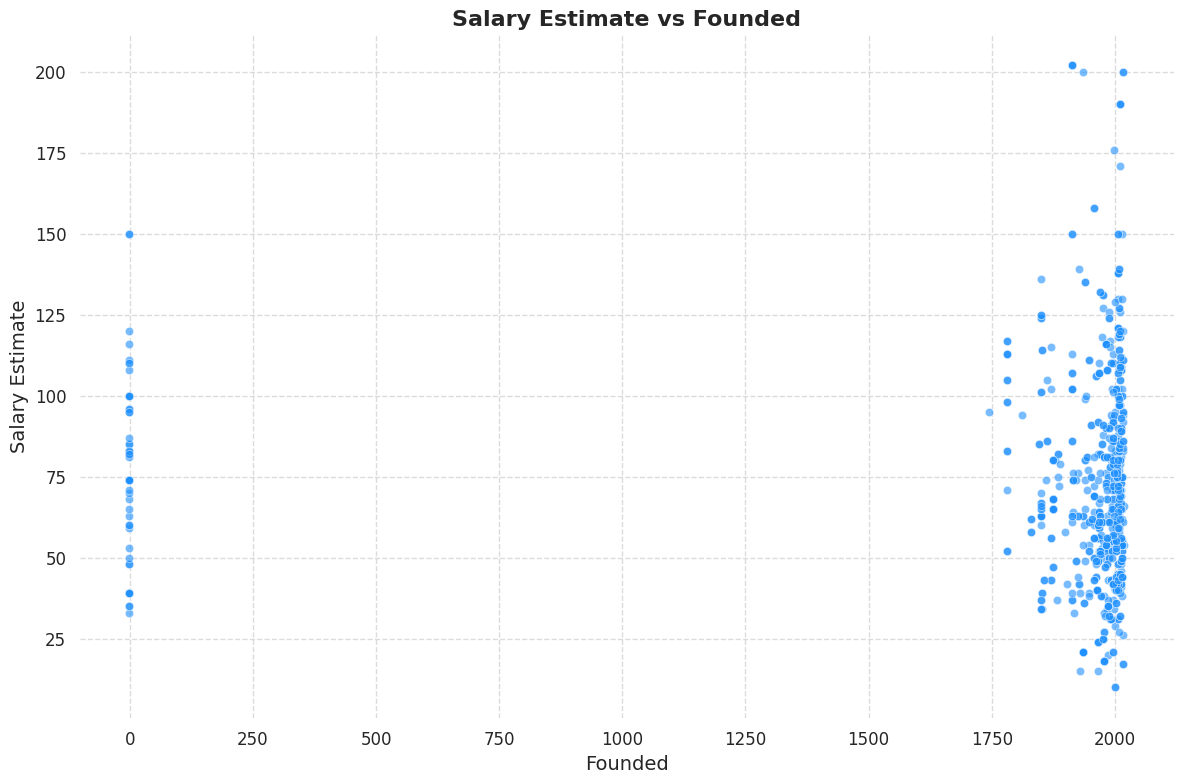

In [18]:
#@title Scatter Plots for Numerical Variables

# Set the style of the plot
sns.set(style="whitegrid")

# Define a color for the scatter points
scatter_color = 'dodgerblue'

for col in numerical_columns:
    if col != 'Salary Estimate':
        plt.figure(figsize=(12, 8))
        sns.scatterplot(x=df[col], y=df['Salary Estimate'], alpha=0.6, color=scatter_color)
        plt.title(f'Salary Estimate vs {col}', fontsize=16, fontweight='bold')
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Salary Estimate', fontsize=14)

        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)

        plt.grid(True, linestyle='--', alpha=0.7)
        sns.despine(left=True, bottom=True)

        plt.tight_layout()
        plt.show()

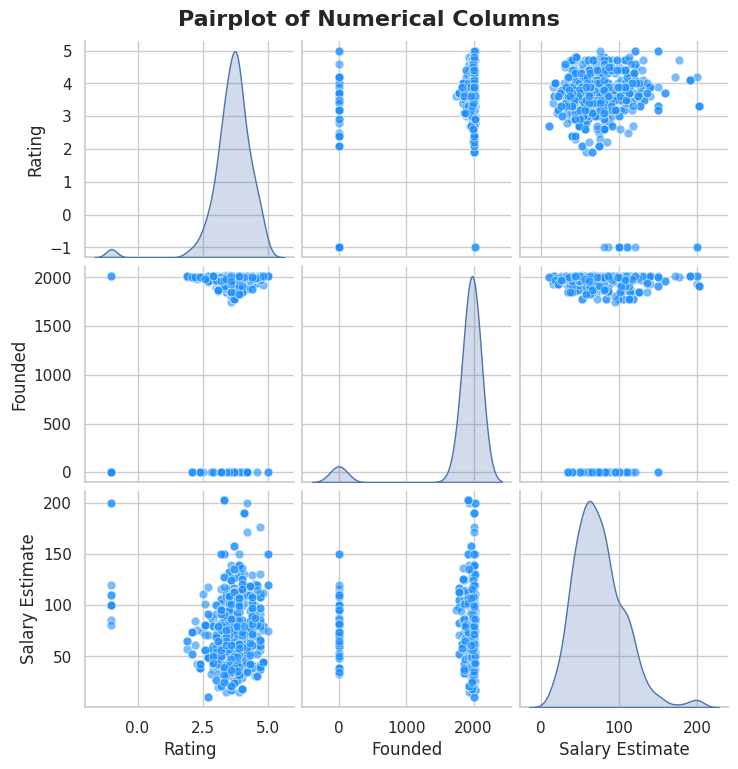

In [22]:
#@title Pair Plots for Numerical Variables

# Set the style of the plot
sns.set(style="whitegrid")

# Create the pairplot with customizations
pairplot = sns.pairplot(df[numerical_columns],
                        diag_kind='kde',  # Use KDE plots on the diagonal
                        plot_kws={'alpha': 0.6, 's': 40, 'color': 'dodgerblue'},  # Custom plot keywords
                        height=2.5)  # Increase the plot size

# Add a title
pairplot.fig.suptitle("Pairplot of Numerical Columns", y=1.02, fontsize=16, fontweight='bold')

# Show the plot
plt.show()

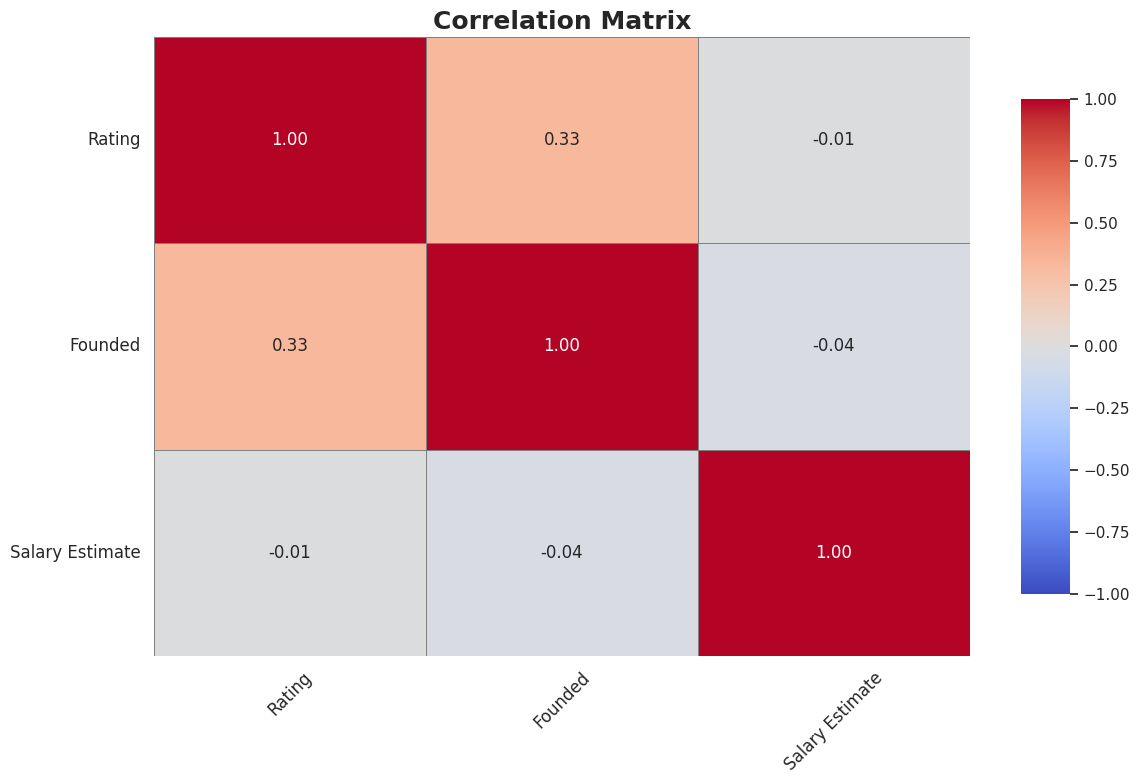

In [24]:
#@title Heatmap for Correlation Matrix

# Set the style of the plot
sns.set(style="white")

# Create the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df[numerical_columns].corr(),
                      annot=True,  # Show correlation coefficients
                      fmt=".2f",  # Format annotations to 2 decimal places
                      cmap='coolwarm',  # Color map
                      vmin=-1, vmax=1,  # Set the range for color mapping
                      center=0,  # Center the color map at zero
                      linewidths=0.5,  # Add lines between cells
                      linecolor='gray',  # Color of the lines between cells
                      cbar_kws={'shrink': .8, 'aspect': 10})  # Color bar customization

# Customize the title and axis labels
plt.title('Correlation Matrix', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12, rotation=0)  # Rotate y-axis labels

# Show the plot
plt.tight_layout()  # Adjust the layout to prevent clipping of labels
plt.show()